# Анализ географии производства контента

In [1]:
import json
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import userdata

In [2]:
# Авторизация и загрузка датасета

kaggle_user = userdata.get('KAGGLE_USER')
kaggle_key = userdata.get('KAGGLE_KEY')
kaggle_token = {'username': kaggle_user, 'key': kaggle_key}

!mkdir -p ~/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(kaggle_token, file)
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d shivamb/netflix-shows
!unzip -o netflix-shows.zip

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [3]:
# Кодировка указана для корректного чтения символов

df = pd.read_csv('netflix_titles.csv', encoding='ISO-8859-1')

# Подготовка

In [4]:
# Первичный просмотр данных

print('HEAD', '\n', df.head())
print('TAIL', '\n', df.tail())

HEAD 
   show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021 

In [5]:
# Оценка объема данных

print('ОБЪЕМ ДО ЧИСТКИ:', df.shape)

ОБЪЕМ ДО ЧИСТКИ: (8807, 12)


In [6]:
# Оценка количества пропусков

print('ПРОПУСКИ ДО ЧИСТКИ')

df.isna().sum()

ПРОПУСКИ ДО ЧИСТКИ


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [7]:
# Удаление пропусков в колонке 'country', она потребуется для анализа

df = df.dropna(subset=['country'])

print('ПРОПУСКИ ПОСЛЕ ЧИСТКИ')

df.isna().sum()

ПРОПУСКИ ПОСЛЕ ЧИСТКИ


,0
show_id,0
type,0
title,0
director,2225
cast,671
country,0
date_added,9
release_year,0
rating,3
duration,3


In [8]:
# Удаление полных дублей

df = df.drop_duplicates()

print('ОБЪЕМ ПОСЛЕ ЧИСТКИ:', df.shape)

ОБЪЕМ ПОСЛЕ ЧИСТКИ: (7976, 12)


In [9]:
# Проверка типов данных на соответствие ожидаемым

df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [10]:
# Просмотр корректности указания названий стран, они будут использоваться в итоговом результате

print(df['country'].head(10))

0                                         United States
1                                          South Africa
4                                                 India
7     United States, Ghana, Burkina Faso, United Kin...
8                                        United Kingdom
9                                         United States
12                              Germany, Czech Republic
15                                        United States
17                                               Mexico
21                                               Turkey
Name: country, dtype: object


In [11]:
# Приведение значений колонки 'country' к ожидаемому виду
# Список стран -> одна (основная) страна

df['main_country'] = df['country'].str.split(', ').str[0].str.strip()

# Проверка новых значений стран

print(df['main_country'].head(10))

0      United States
1       South Africa
4              India
7      United States
8     United Kingdom
9      United States
12           Germany
15     United States
17            Mexico
21            Turkey
Name: main_country, dtype: object


In [12]:
# Определение топ-10 стран-производителей контента для итогового списка
# Индекс сброшен для удобства визуализации

top_countries = df['main_country'].value_counts().head(10).reset_index()

# Проверка корректности формирования списка

print(top_countries)

     main_country  count
0   United States   3210
1           India   1008
2  United Kingdom    626
3          Canada    271
4           Japan    259
5          France    212
6     South Korea    211
7           Spain    181
8          Mexico    134
9       Australia    117


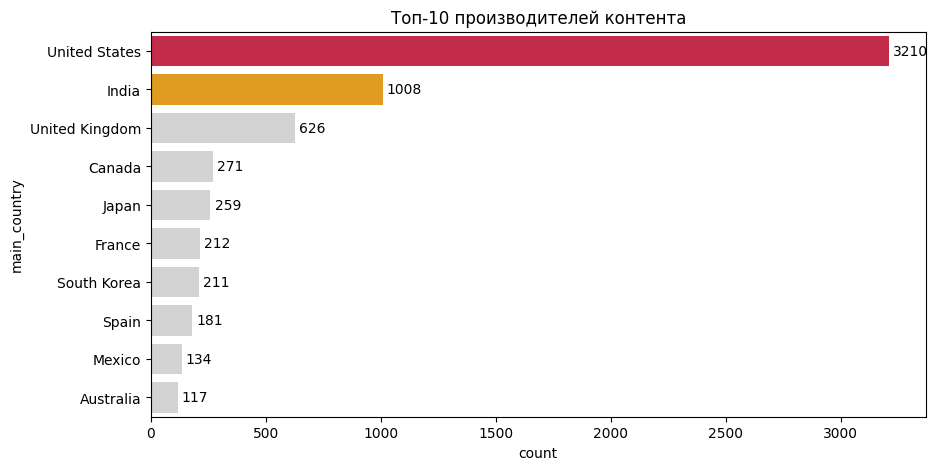

In [13]:
# ВИЗУАЛИЗАЦИЯ ИТОГОВОГО СПИСКА

plt.figure(figsize=(10, 5))

# Цвета для акцентирования лидеров

top_colors = ['crimson', 'orange']
base_color = 'lightgrey'
base_count = len(top_countries) - len(top_colors)
colors = top_colors + [base_color] * base_count

# Построение диаграммы
# Запись в 'ax' нужна для указания количества контента по странам

ax = sns.barplot(
    data=top_countries,
    x='count',
    y='main_country',
    hue='main_country',
    legend=False,
    palette=colors
)

# Указание количества для каждой линии

def show_count(line):
    ax.bar_label(line, padding=3)

[show_count(container) for container in ax.containers]

plt.title('Топ-10 производителей контента')

plt.show()

**Выводы:**
1. США - лидер по производству контента.
2. Индия - основной развивающийся рынок, занимает второе место.

**Итоги:**
1. Сформирован список топ-10 стран-производителей контента.
2. Построен график с акцентом на лидеров рынка.

**Рекомендации:**
1. В первую очередь направить бюджет на локализацию контента США (лидеры рынка).
2. Во вторую очередь обратить внимание на контент Индии (основной развивающийся рынок).
3. Для остальных стран из списка топ-10 составить общий план локализации (их вклад значительно ниже лидеров).